In [3]:
# !pip install pandas

import pykoopman as pk
import numpy as np
# import scienceplots
from matplotlib import pyplot as plt
# plt.style.use('science')

from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [431]:
# import sys
# sys.path.append('../../src')

In [432]:
# %ls ..\..\src

# Introduction

This notebook is for exploiting symmetry in dynamical systems to better learn Koopman operator. 

## Equivariant dynamical system
Here we use the concept of equivariance of better say what we mean by symmetry. Given a group of unitary transformation $\Gamma$, we have for $x_{n+1} = f(x_n)$, the following equivariance, 

$$\gamma(f(x)) = f(\gamma(x)), \quad \forall \gamma \in \Gamma$$
which says $\gamma (\cdot) $ commutes with $f(\cdot)$ in the finite-dimensional state space.

### Equivariance on Koopman operator

Now, look at the Koopman operator, we have 
$$\mathcal{K}[g] = g\circ f$$
which means $x_{n} = \mathcal{K}^{n} [\mathbb{I}] (x_0) = [\mathbb{I}]f^{n}(x_0) = f^{n}(x_0)$. Since $\gamma$ commutes with the dynamics $f$ from equivariance property, we have 
$$\gamma(x_n) = \gamma(f^{n}(x_0)) =f^{n}(\gamma (x_0))$$ 
which also says $\gamma$ commutes with the new vector-valued function $\mathcal{K}^n \mathbb{I}$ 
$$\gamma(x_{n}) = \gamma(\mathcal{K}^{n} [\mathbb{I}](x_0)) = f^{n}(\gamma(x_0)) = \mathcal{K}^n [ \mathbb{I}] (\gamma (x_0)).$$


<!-- 

we have $\mathcal{K}\phi = \lambda \phi$ and $\gamma(\mathcal{K} \phi) = \gamma (\lambda \phi) $. An key observation is that $\gamma$ is a linear map in our context, so a linear map does commute with scalar multiplication by definition. Hence, $\gamma(\mathcal{K} \phi(x)) = \lambda \gamma (\phi(x)) = \mathcal{K}(\gamma(\phi(x)))$. We can safely say since $\phi(x)$ is an eigenfunction of $\mathcal{K}$, then $\gamma(\phi(x))$ must be an eigenfunction of $\mathcal{K}$ with the same eigenvalue $\lambda$ as well.


Now, let's look at Koopman eigenfunctions, we assume the system $x$ lies in a $L$-dimensional Koopman invariant subspace.

$$x_{n+j} = f^j(x_n) = C K^j \Psi(x_n),\quad \forall j \in \mathbb{N}$$
$$\Psi(x_{n+j}) = K^j \Psi(x_n) $$


Since $\gamma(x_{n+j}) = f^j(\gamma (x_n))$  we must have  $C K^j \Psi(\gamma (x_n)) = \gamma(x_{n+j})$.


Now, the real question is that is Koopman eigenfunction $\phi$ $\Gamma$-equivariant? -->

## Group action $\gamma * (\cdot)$ on observable

Note that the above equivariance notion only applies to a vector-field function of a dynamical system thus **does not apply to general functions with arbitrary output dimensions**. To better introduce symmetry for general function, i.e., observable, let's define group action on observable.

A group action $\gamma$ on observable $g$ is defined as 
$$
\gamma * g(x) = g(\gamma^{-1}(x)) 
$$
note that such fancy $*$ has nothing to do with multiplication

### Group action $\gamma * (\cdot)$ commutes with Koopman operator in the function space
For any observable $g$, we have this from Koopman operator
$$
\mathcal{K}[g] = g \circ f
$$
now let's perform group action on the new observable $g \circ f$, we have
$$
\gamma * [\mathcal{K} [g]](x) = \gamma * [g \circ f](x) = [g \circ f] (\gamma^{-1} (x)) = \mathcal{K} [g](\gamma^{-1}(x)) = \mathcal{K} [\gamma * g ](x) 
$$
which means group action $\gamma * (\cdot)$ commutes with $\mathcal{K}$ **in the function space**.


### Group action on Koopman eigenfunctions

How about group action on any Koopman eigenfunction $\phi$? Say $\gamma * \phi(x) = \phi(\gamma^{-1}(x))$?

Since $\phi$ is the Koopman eigenfunction, we have $\mathcal{K} \phi = \lambda \phi$. Because
$$\mathcal{K} [\gamma * \phi](x) = \mathcal{K} [\phi \circ \gamma^{-1}](x) = \mathcal{K} [\phi ](\gamma^{-1}(x)) = \lambda \phi(\gamma^{-1}(x)) =\lambda [\gamma * \phi] (x) $$
Hence, if $\phi$ is an eigenfunction, we have $\gamma * \phi = \phi \circ \gamma^{-1}$ must also be an eigenfunction. 

This is to say, if $x$ lies on some that is not isotropy set (fixed point sort of), then we can reduce the phase space via symmetric partition. 

First, it is possible that one can add extra eigenfunctions while ignore this symmetry property. Second, we can leverage this property by constructing symmetric eigenfunctions, which simplfies the complexity of the function and might help generalization.

- $\phi \rightarrow \gamma * \phi$ is also a eigenfunction. 
- a first try is considering constraining $\phi$ as  $\phi(\gamma^{-1}(x)) = \phi(x) $, but I later found this is not going to work. Because if state $x$ is contained in $\phi$, say $x = b_c^\top \phi$, then there is no way $-x_1 = -b_c^\top \phi(x) = x_1 = b_c^\top \phi(x)$ for any nontrivial $x_1$ in the phase space. This means if we do the constraints, we will find no $\Phi$ exists for that.
- a second try is considering $\phi(\gamma^{-1}(x)) = - \phi(x) $, this will not work in the case of Lorenz because when states are explicitly included, there is no way $b_{x_3}^\top \phi(x) = x_3 = -x_3 = -b_{x_3}^\top \phi(x)$ for any nontrivial $x_3$.
- a third try is again consider indicator function $\mathbb{1}_{\mathcal{M}}$, say the group is $\mathbb{Z}^2$, 
we have eigenfunctions
$$
\Phi(x) = [\mathbb{1}_{\mathcal{M}_1}(x) \Phi(x), \, \mathbb{1}_{\mathcal{M}_2}(x) \Phi(\gamma^{-1}(x))], \quad C = [C, \, \gamma C]
$$
Then
$$
x_{n} = C \Lambda^{n} \Phi(x_0)^\top  
$$

In other words,
$$
\textrm{if } x \in \mathcal{M}_1, \quad x_n = B \Lambda^n \Phi(x)$$
$$
\textrm{if } x \in \mathcal{M}_2, \textrm{ where each } \gamma^{-1}(x)\in \mathcal{M}_1, \quad x_n = \gamma(B \Lambda^n \Phi(\gamma^{-1}(x)))
$$

###  EDMD with symmetric consideration

Let's follow the third try. How to embed symmetry in EDMD? One idea is to training only for $\mathcal{M}_1$. So the EDMD does not have to figure out by itself that the system has a symmetry. Let's try it!

## case of unforced duffing oscillator

In [4]:
import numpy as np
from scipy.integrate import solve_ivp
delta = 0.5
beta = -1
alpha = 1

def duffing(t, x):
    dxdt = np.zeros_like(x)
    dxdt[0] = x[1]
    dxdt[1] = -delta*x[1] - x[0]*(beta+alpha*x[0]**2)
    return dxdt

def get_duffing(y0):
    t0 = 0
    t1 = 10
    t_eval = np.linspace(t0,t1,50)
    
    # sol = solve_ivp(duffing, [t0,t1], [-2, 4],t_eval=t_eval)
    sol = solve_ivp(duffing, [t0,t1], y0,t_eval=t_eval)
    
    return sol    

# draw duffing vector  field

In [5]:
xxx,yyy = np.meshgrid(np.linspace(-2,2,500),np.linspace(-2,2,500))


u = yyy
v = -delta*yyy - xxx*(beta+alpha*xxx**2)
mag = np.sqrt(u**2+v**2)

# u = -y/np.sqrt(x**2 + y**2)
# v = x/np.sqrt(x**2 + y**2)

print(mag.min())



0.00447572661217746


In [6]:
# option to turn on domain of attraction refinement
REFINE = True

In [7]:
# Define the range and number of points
range_min, range_max = -2, 2
num_points = 7  # This will create 100x100 grid

# Generate linearly spaced points
x = np.linspace(range_min, range_max, num_points,endpoint=True)

if REFINE:
    # 0,1,2, 3,4 ,5,6,7
    # change 3th and 4th x
    x[2] =  -8.5e-2
    x[3] =  -8e-2
    x[4] =  -7.5e-2

y = 2*np.ones_like(x)
xx, yy = np.meshgrid(x, y)

ic1 = np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])

x = np.linspace(range_min, range_max, num_points,endpoint=True)

if REFINE:
    x[2] =  7.5e-2
    x[3] =  8e-2
    x[4] =  8.5e-2

y = -2*np.ones_like(x)
xx, yy = np.meshgrid(x, y)

ic2 = np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])

# Create a meshgrid

ic = np.vstack([ic1,ic2])

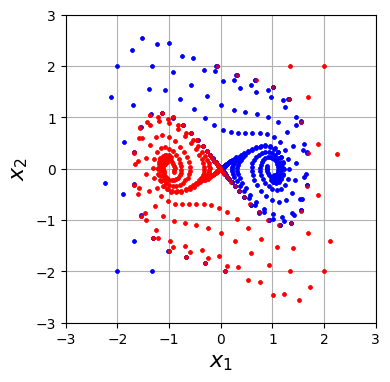

In [8]:
fig,axs  = plt.subplots(1,1,figsize=(4,4))

right_traj_data = []
left_traj_data = []
for y0 in ic:
    sol = get_duffing(y0)
    if sol.y[0][-1] < 0:
        axs.plot(sol.y[0],sol.y[1],'ro',markersize=2,alpha=0.5,lw=0.1)
        left_traj_data.append(sol.y)
    else:
        right_traj_data.append(sol.y)
        plt.plot(sol.y[0],sol.y[1],'bo',markersize=2,alpha=0.5,lw=0.1)
# plt.grid('on')


# plt.figure(figsize=(2,2))
# plt.quiver(x,y,u,v)
ths = 1
# plt.scatter(x[mag<ths],y[mag<ths],alpha=0.2)
# im = axs[0].contour(xxx,yyy,mag,levels=[0.01,0.05,0.1,0.2,0.4,0.8,1.6])
# axs[0].set_title('contour of velocity mag')
# plt.colorbar(im, ax=axs[0])


for i in range(1):
    axs.set_xlabel(r"$x_1$",fontsize=16)
    axs.set_ylabel(r"$x_2$",fontsize=16)
    axs.grid('on')
    axs.set_xlim([-3,3])
    axs.set_ylim([-3,3])
# plt.colorbar()
    
plt.savefig(f"data_duffing.png",dpi=150)
# plt.ylim([-2,2])
# plt.xlim([-2,2])
# plt.axis('equal')

In [9]:
right_data = np.stack(right_traj_data,2)
left_data = np.stack(left_traj_data,2)

In [10]:
right_data.shape

(2, 50, 49)

In [11]:
left_data.shape

(2, 50, 49)

## generate classification data

In [12]:
range_min = -2
range_max = 2
num_points = 50
x = np.linspace(range_min, range_max, num_points)
y = np.linspace(range_min, range_max, num_points)
xx, yy = np.meshgrid(x, y)
ic_for_c = np.hstack([xx.reshape(-1,1),yy.reshape(-1,1)])

In [13]:
label = np.zeros(ic_for_c.shape[0])
for i, y0 in enumerate(ic_for_c):
    sol = get_duffing(y0)
    if sol.y[0][-1] > 0:
        label[i] = 1

In [14]:
feature = ic_for_c

In [17]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [18]:
clf = SVC(gamma='auto')
clf.fit(feature, label)

SVC(gamma='auto')

In [19]:
# tuned_parameters = [
#     {"kernel": ["rbf"], "gamma": [1e-3, 1e-4], "C": [1, 10, 100, 1000]},
#     {"kernel": ["linear"], "C": [1, 10, 100, 1000]},
# ]
# scores = ["precision", "recall"]
# grid_search = GridSearchCV(
#     SVC(), tuned_parameters, scoring=scores, refit=refit_strategy
# )
# grid_search.fit(feature, label)

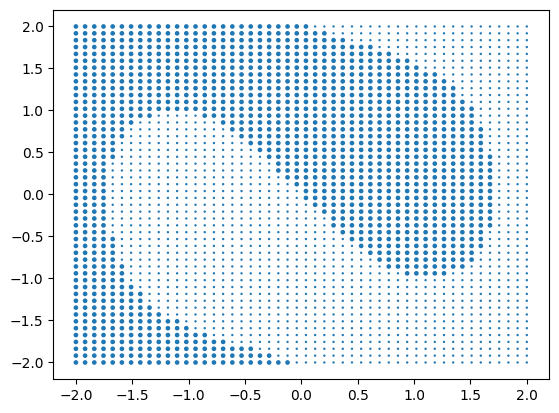

In [20]:
predict = clf.predict(feature)
plt.scatter(feature[:,0],feature[:,1],s=0.5+5*predict)

## Learn Koopman operator on the left attractor

In [21]:
X = left_data[:,:-1,:].reshape(2,-1,order='F')
Y = left_data[:,1:,:].reshape(2,-1,order='F')

### train Koopman operator on left attractor dataset

In [22]:
EDMD = pk.regression.EDMD()
# OBS = pk.observables.RadialBasisFunction(rbf_type='thinplate', n_centers=25,
#                                          centers=None, kernel_width=1, 
#                                          polyharmonic_coeff=2.0, include_state=True)
# # 
OBS = pk.observables.RandomFourierFeatures(gamma=1,D=5,random_state=10)
# OBS = pk.observables.Polynomial(3)

model = pk.Koopman(observables=OBS, regressor=EDMD)
model.fit(X.T, y=Y.T)

Koopman(observables=RandomFourierFeatures(D=5, gamma=1, random_state=10),
        regressor=EDMD())

In [23]:
model.A.shape

(12, 12)

## train Koopman operator on the entire dataset

In [24]:
X2 = right_data[:,:-1,:].reshape(2,-1,order='F')
Y2 = right_data[:,1:,:].reshape(2,-1,order='F')

# plt.scatter(X2[0],X2[1])
# plt.scatter(Y2[0],Y2[1])

X2 = np.hstack([X,X2])
Y2 = np.hstack([Y,Y2])

In [25]:
EDMD = pk.regression.EDMD()

# OBS = pk.observables.RadialBasisFunction(rbf_type='thinplate', n_centers=25,
#                                          centers=None, kernel_width=1, 
#                                          polyharmonic_coeff=2.0, include_state=True)
OBS = pk.observables.RandomFourierFeatures(gamma=1,D=5,random_state=10)
# OBS = pk.observables.Polynomial(3)

model_whole = pk.Koopman(observables=OBS, regressor=EDMD)
model_whole.fit(X2.T, y=Y2.T)

Koopman(observables=RandomFourierFeatures(D=5, gamma=1, random_state=10),
        regressor=EDMD())

### make prediction on global domain

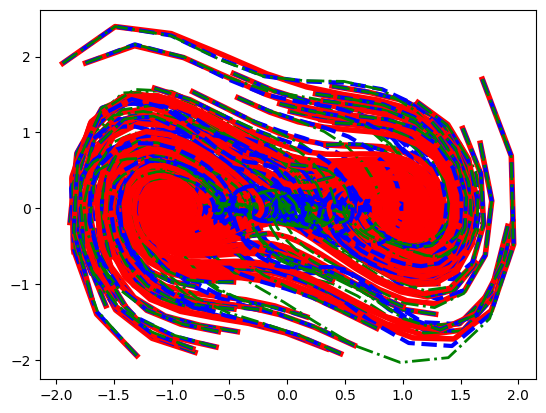

In [26]:
x0_rand = np.random.uniform(-2,2,(100,2))

count_err_A = []
count_err_B = []

for x0 in x0_rand:
    # x0 = np.array([1.2732,-1.4777])
    sol = get_duffing(x0)
    t = sol.t

    # classifier
    label_ = clf.predict(x0[np.newaxis,:])

    # if sol.y[0][-1] > 0:
    #     label_ = 1

    # model prediction
    if label_ == 1:
        Xkoop = model.simulate(-x0, n_steps=len(t)-1)
        Xkoop = np.vstack([-x0[np.newaxis,:], Xkoop]).T
        Xkoop = -Xkoop
    else:
        Xkoop = model.simulate(x0, n_steps=len(t)-1)
        Xkoop = np.vstack([x0[np.newaxis,:], Xkoop]).T

    # model_whole prediction
    Xkoop_whole = model_whole.simulate(x0, n_steps=len(t)-1)
    Xkoop_whole = np.vstack([x0[np.newaxis,:], Xkoop_whole]).T
    
    plt.plot(sol.y[0], sol.y[1],'r-',lw=4,label='true')
    plt.plot(Xkoop[0], Xkoop[1],'b--',lw=3,label='pykoopman - symmetry')
    plt.plot(Xkoop_whole[0], Xkoop_whole[1],'g-.',lw=2,label='pykoopman - whole')

    err_A = mean_squared_error(sol.y, Xkoop)
    err_B = mean_squared_error(sol.y, Xkoop_whole)

    # print('A: ',err_A,'B: ',err_B)

    count_err_A.append(err_A)
    count_err_B.append(err_B)


# plt.legend(loc='best')

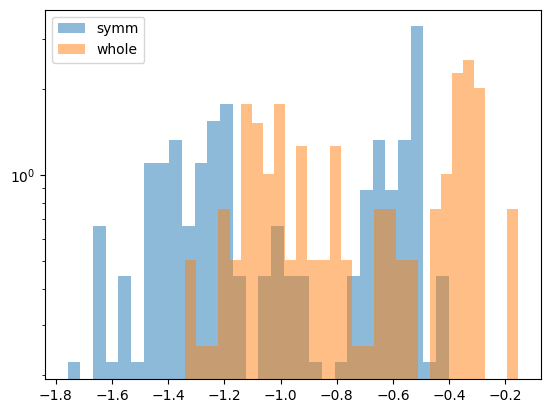

In [27]:
plt.hist(np.log10(count_err_A),bins=30,log=True,density=True,label='symm',alpha=0.5)
plt.hist(np.log10(count_err_B),bins=30,log=True,density=True,label='whole',alpha=0.5)
plt.legend()

# Comparison

Configure A: using left and right attractor to learn the classifier. Then use only one of them to get the Koopman. 

Configure B: using the entire data to learn the Koopman. 

We sweep the number of features in random fourier features. 

In [28]:
from scipy.stats.qmc import LatinHypercube, Sobol

# sampler = LatinHypercube(2)
sampler = Sobol(d=2, scramble=False)

# sampler_x0 = LatinHypercube(2)
sampler_x0 = Sobol(d=2, scramble=False)

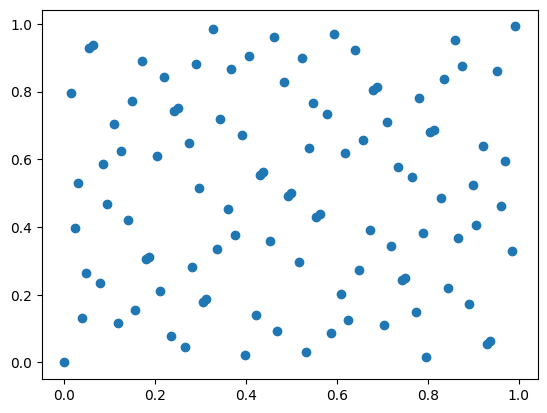

In [29]:
data = sampler.random(100)
plt.scatter(data[:,0],data[:,1])

In [30]:
# obs_type = 'rbf'
# obs_type = 'rff'
obs_type = 'poly'

In [31]:
if obs_type == 'rbf':
    D_array = np.arange(2,16,2)
elif obs_type == 'rff':
    D_array = np.arange(2,16,2)
elif obs_type == 'poly':
    D_array = np.arange(2,8,1)

def trial():
    mse_A_list = []
    mse_B_list = []
    
    # start random testing data within -2 and 2
    # x0_rand = np.random.uniform(-2,2,(20,2))
    x0_rand = sampler_x0.random(200)*3-3.0/2
    
    centers_ = sampler.random(22).T*3-3.0/2
    
    for D in D_array:
    
        # uniform distribute centers in [-2,2]
        # centers = np.random.uniform(-1.8,1.8,(2,D))
    
        centers = centers_[:,:D]
        
        # A
        EDMD = pk.regression.EDMD()
    
        # print(D)
        if obs_type == 'rbf':
            OBS = pk.observables.RadialBasisFunction(rbf_type='thinplate', n_centers=int(D),
                                             centers=centers, kernel_width=1, 
                                             polyharmonic_coeff=1.0, include_state=True)
        elif obs_type == 'rff':
            OBS = pk.observables.RandomFourierFeatures(gamma=1,D=D,random_state=0)
        elif obs_type == 'poly':
            OBS = pk.observables.Polynomial(D)
        else:
            raise TypeError
        
        model = pk.Koopman(observables=OBS, regressor=EDMD)
        model.fit(X.T, y=Y.T)
    
        # B
        EDMD = pk.regression.EDMD()
        # OBS = pk.observables.RandomFourierFeatures(gamma=1,D=D,random_state=0)
        model_whole = pk.Koopman(observables=OBS, regressor=EDMD)
        model_whole.fit(X2.T, y=Y2.T)
    
        A_list = []
        B_list = []
        for x0 in x0_rand:
            sol = get_duffing(x0)
            t = sol.t
        
            # classifing which attractor they are
            label_ = clf.predict(x0[np.newaxis,:])
            
            # if sol.y[0][-1] < 0:
            #     label_ = 1
            
            # model prediction
            if label_ == 1:
                Xkoop = model.simulate(-x0, n_steps=len(t)-1)
                Xkoop = np.vstack([-x0, Xkoop]).T
                Xkoop = -Xkoop
            else:
                Xkoop = model.simulate(x0, n_steps=len(t)-1)
                Xkoop = np.vstack([x0, Xkoop]).T
        
            # model_whole prediction
            Xkoop_whole = model_whole.simulate(x0, n_steps=len(t)-1)
            Xkoop_whole = np.vstack([x0, Xkoop_whole]).T
    
            # compute MSE
            err_A = mean_squared_error(sol.y, Xkoop)
            err_B = mean_squared_error(sol.y, Xkoop_whole)
    
            A_list.append(err_A)
            B_list.append(err_B)
        tmpA = np.array(A_list)
        tmpB = np.array(B_list)
    
        mse_A_list.append(tmpA)
        mse_B_list.append(tmpB)
        
    return mse_A_list, mse_B_list

In [32]:
A_list, B_list = [], []
for i in range(10):
    mse_A_list, mse_B_list = trial()
    A_list.append(mse_A_list)
    B_list.append(mse_B_list)

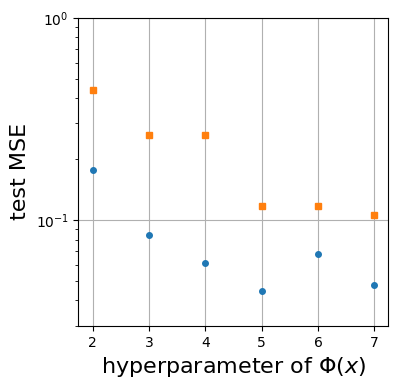

In [33]:
# import matplotlib as mpl
# mpl.rcParams['figure.dpi'] = 200
# D_array = np.arange(2,16,2)
plt.figure(figsize=(4,4))
if obs_type == 'rbf':
    plt.semilogy(D_array, np.stack(A_list,1).mean(axis=(1,2)),'o',markersize=4,
                 label='symmetry-constrained EDMD')
    plt.semilogy(D_array, np.stack(B_list,1).mean(axis=(1,2)),'s',markersize=4,
                 label='vanilla EDMD')
    plt.legend(loc='best',frameon=True,fontsize=12)
else:
    plt.semilogy(D_array, np.stack(A_list,1).mean(axis=(1,2)),'o',markersize=4)
    plt.semilogy(D_array, np.stack(B_list,1).mean(axis=(1,2)),'s',markersize=4)
plt.xlabel(r"hyperparameter of $\Phi(x)$",fontsize=16)
plt.ylabel("test MSE",fontsize=16)
plt.xticks(D_array)
plt.ylim([0.03,1])
plt.grid('on')
plt.savefig(f"testing_one_vs_two_REFINE_{str(REFINE)}_OBS_{str(obs_type)}.png",dpi=150)
# for i in range(len(mse_A_list)):
#     plt.figure(figsize=(8,6))
#     counter_err_A = mse_A_list[i]
#     counter_err_B = mse_B_list[i]
#     plt.hist(np.log10(counter_err_A),bins=30,log=True,density=True,label='symm',alpha=0.5)
#     plt.hist(np.log10(counter_err_B),bins=30,log=True,density=True,label='whole',alpha=0.5)
#     plt.title(f"MSE compare symm = {np.mean(counter_err_A)} vs whole = { np.mean(counter_err_B)}" ) 
#     plt.legend()

## Chaotic Lorenz attractor


$$
\frac{dx}{dt} = \sigma(y-x)
$$
$$
\frac{dy}{dt} = x(\rho - z) - y
$$
$$
\frac{dz}{dt} = xy - \beta z
$$


In [34]:
OBS = pk.observables.Polynomial(7) # 7 works ,we can show duplicate is better
# OBS = pk.observables.Polynomial(8)

In [35]:
def lorenz_system(state, sigma=10., beta=8/3., rho=28.):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return np.array([dxdt, dydt, dzdt])

dt=5e-3
B = np.array([1,0,0])
def f(x,u):
    y = x+ dt*lorenz_system(x) + dt*B * u
    return y

t = np.arange(0,2000)*dt
t_ori = t.copy()
t_new = np.arange(2000,3000)*dt

x0 = np.array([0,1,0])
x_list = [x0]

for i in range(len(t)-1):
    x = f(x_list[-1],0)
    x_list.append(x)
sol=np.array(x_list)

# testing trajectory starts from the last training trajectory
x0 = sol[-1]
# x0 = np.array([0,1,0])
x_new_list = [x0]
for i in range(len(t_new)-1):
    x = f(x_new_list[-1],0)
    x_new_list.append(x)
sol_new=np.array(x_new_list)

In [36]:
# X = sol[:-1,:].T
# Y = sol[1:,:].T

# coarsen in time
sol = sol[::4]
X = sol[:-1,:].T
Y = sol[1:,:].T

t = t[::4][:-1]
t_new = t_new[::4]
sol_new = sol_new[::4]

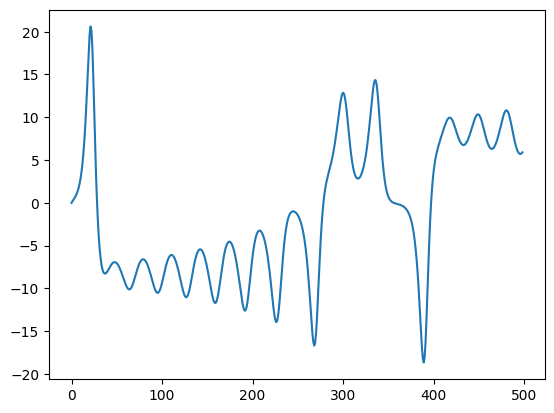

In [37]:
plt.plot(X[0])

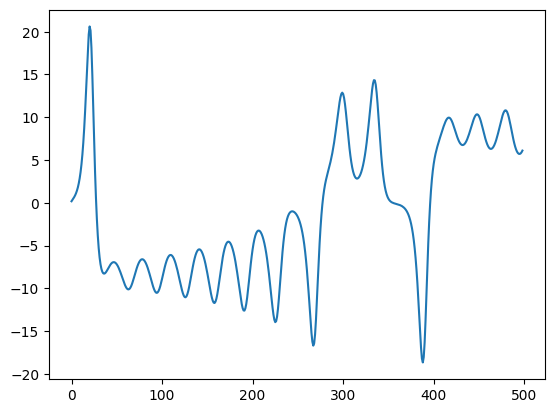

In [38]:
plt.plot(Y[0])

In [39]:
X.shape

(3, 499)

In [40]:
sol_new.shape

(250, 3)

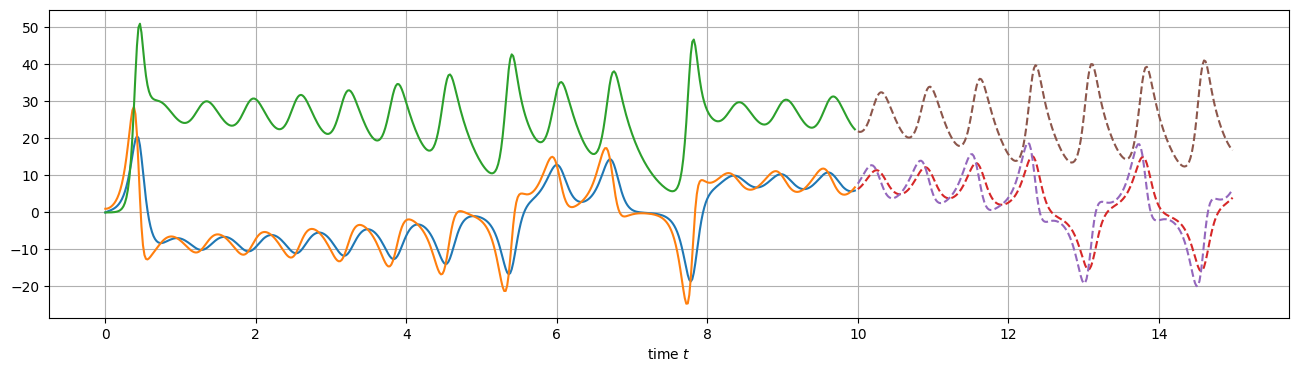

In [41]:
plt.figure(figsize=(16,4))
plt.plot(t,X.T)
plt.xlabel('time $t$')
plt.grid('on')

plt.plot(t_new, sol_new,'--')

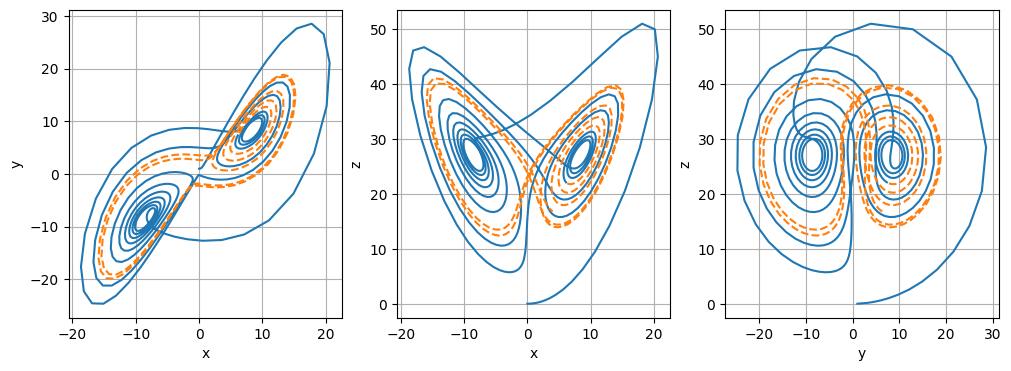

In [42]:
fig,axs = plt.subplots(1,3,figsize=(12,4))
axs[0].plot(sol[:,0],sol[:,1])
axs[0].plot(sol_new[:,0],sol_new[:,1],'--')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")
axs[0].grid('on')

axs[1].plot(sol[:,0],sol[:,2])
axs[1].plot(sol_new[:,0],sol_new[:,2],'--')
axs[1].set_xlabel("x")
axs[1].set_ylabel("z")
axs[1].grid('on')

axs[2].plot(sol[:,1],sol[:,2])
axs[2].plot(sol_new[:,1],sol_new[:,2],'--')
axs[2].set_xlabel("y")
axs[2].set_ylabel("z")
axs[2].grid('on')

## train EDMD for the whole domain

In [43]:
EDMD = pk.regression.EDMD()
model_lorenz_whole = pk.Koopman(observables=OBS, regressor=EDMD)
model_lorenz_whole.fit(X.T, y=Y.T)

Koopman(observables=Polynomial(degree=7), regressor=EDMD())

## plot RMSE over horizon

In [44]:
n_horizon_arr = np.arange(1,50,1) 

rerr_array_lorenz_whole = np.zeros(n_horizon_arr.shape)
std_array = np.zeros(n_horizon_arr.shape)
for i,n_horizon in enumerate(n_horizon_arr):
    # print("i=",i,'n_horizon = ',n_horizon)
    rerr_list = []
    for j in range(sol_new.shape[0]-n_horizon):
        x0 = sol_new[j]
        Xkoop = model_lorenz_whole.simulate(x0, n_steps=n_horizon)
        rerr = np.linalg.norm(Xkoop - sol_new[j+1:j+n_horizon+1])**2/n_horizon
        rerr_list.append(rerr)
    mean_rerr = np.array(rerr_list).mean()
    std_rerr = np.array(rerr_list).std()
    # print(mean_rerr)
    rerr_array_lorenz_whole[i] = mean_rerr
    std_array[i] = std_rerr


# plt.plot(n_horizon_arr*(t_new[1]-t_new[0]), rerr_array_lorenz_whole)
# plt.xlim([0,0.3])
# plt.ylim([0,20])
# plt.xlabel("horizon (time)")
# plt.ylabel("averaged test MSE")
# plt.grid('on')
# plt.title("Prediction performance of Koopman \n operator is very accurate within 0.25 sec")

## train EDMD for the whole domain with mirror

In [45]:
X_2 = X.copy()
Y_2 = Y.copy()

In [46]:
# flip data from x<0 to x>0
for jj in range(X.shape[1]):

    # flip the x,y components of start point
    X_2[0,jj] = -X_2[0,jj]
    X_2[1,jj] = -X_2[1,jj]

    # also flip the x,y components of the ending point
    Y_2[0,jj] = -Y_2[0,jj]
    Y_2[1,jj] = -Y_2[1,jj]

In [47]:
X_aug = np.hstack([X,X_2])
Y_aug = np.hstack([Y,Y_2])

In [48]:
EDMD = pk.regression.EDMD()
# OBS = pk.observables.Polynomial(6)

model_lorenz_whole_double = pk.Koopman(observables=OBS, regressor=EDMD)
model_lorenz_whole_double.fit(X_aug.T, y=Y_aug.T)

Koopman(observables=Polynomial(degree=7), regressor=EDMD())

In [49]:
n_horizon_arr = np.arange(1,50,1)
rerr_array_lorenz_whole_double = np.zeros(n_horizon_arr.shape)
std_array = np.zeros(n_horizon_arr.shape)
for i,n_horizon in enumerate(n_horizon_arr):
    # print("i=",i,'n_horizon = ',n_horizon)
    rerr_list = []
    for j in range(sol_new.shape[0]-n_horizon):
        x0 = sol_new[j]
        Xkoop = model_lorenz_whole_double.simulate(x0, n_steps=n_horizon)
        rerr = np.linalg.norm(Xkoop - sol_new[j+1:j+n_horizon+1])**2/n_horizon
        rerr_list.append(rerr)
    mean_rerr = np.array(rerr_list).mean()
    std_rerr = np.array(rerr_list).std()
    # print(mean_rerr)
    rerr_array_lorenz_whole_double[i] = mean_rerr
    std_array[i] = std_rerr

### second, only pick half length, the double the data via mirror, so this is fair

In [50]:
X.shape

(3, 499)

In [51]:
Y.shape

(3, 499)

In [52]:
# cut one half
X_half = X[:,249:]
Y_half = Y[:,249:]

In [53]:
X_2 = X_half.copy()
Y_2 = Y_half.copy()

In [54]:
# flip data from x<0 to x>0
for jj in range(X_half.shape[1]):

    # flip the x,y components of start point
    X_2[0,jj] = -X_2[0,jj]
    X_2[1,jj] = -X_2[1,jj]

    # also flip the x,y components of the ending point
    Y_2[0,jj] = -Y_2[0,jj]
    Y_2[1,jj] = -Y_2[1,jj]

In [55]:
X_aug_half = np.hstack([X_half,X_2])
Y_aug_half = np.hstack([Y_half,Y_2])

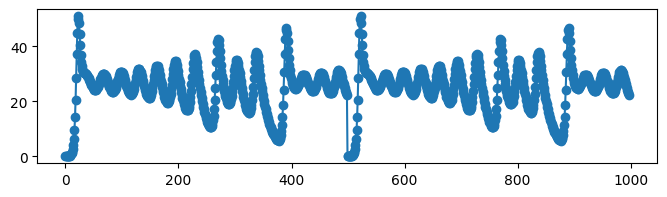

In [56]:
plt.figure(figsize=(8,2))
plt.plot(X_aug[2],'-o')

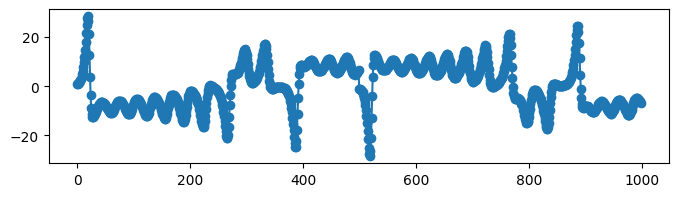

In [57]:
plt.figure(figsize=(8,2))
plt.plot(X_aug[1],'-o')

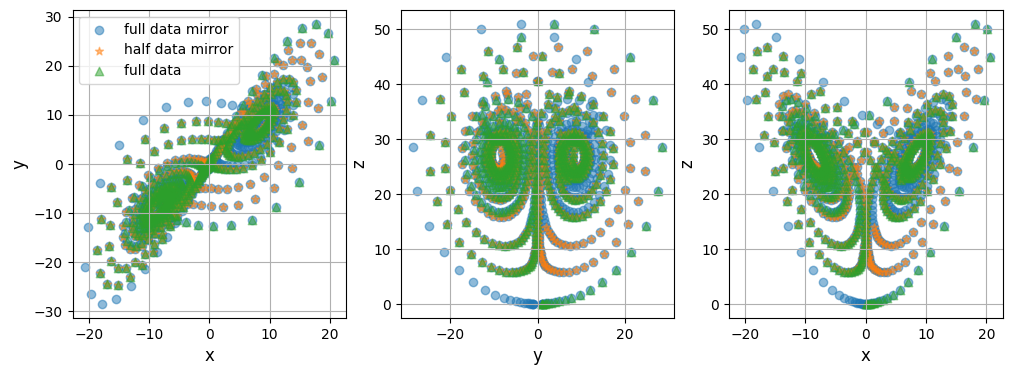

In [58]:
fig,axs = plt.subplots(1,3,figsize=(12,4))
axs[0].scatter(X_aug[0],X_aug[1],marker='o',label='full data mirror',alpha=0.5)
axs[0].scatter(X_aug_half[0],X_aug_half[1],marker='*',label='half data mirror',alpha=0.5)
axs[0].scatter(X[0],X[1],marker='^',label='full data',alpha=0.5)
axs[0].set_xlabel("x",fontsize=12)
axs[0].set_ylabel("y",fontsize=12)
axs[0].grid('on')
axs[0].legend(loc='best')

axs[1].scatter(X_aug[1],X_aug[2],marker='o',alpha=0.5)
axs[1].scatter(X_aug_half[1],X_aug_half[2],marker='*',alpha=0.5)
axs[1].scatter(X[1],X[2],marker='^',alpha=0.5)
axs[1].set_xlabel("y",fontsize=12)
axs[1].set_ylabel("z",fontsize=12)
axs[1].grid('on')


axs[2].scatter(X_aug[0],X_aug[2],marker='o',alpha=0.5)
axs[2].scatter(X_aug_half[0],X_aug_half[2],marker='*',alpha=0.5)
axs[2].scatter(X[0],X[2],marker='^',alpha=0.5)
axs[2].set_xlabel("x",fontsize=12)
axs[2].set_ylabel("z",fontsize=12)
axs[2].grid('on')

plt.savefig("lorenz_data.png",dpi=150)

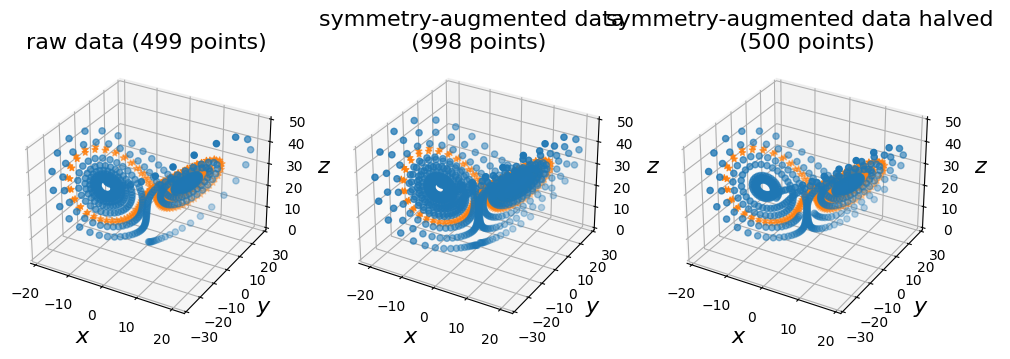

In [59]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,3,1,projection='3d')
ax.scatter(X[0], X[1], X[2], marker='o')
ax.scatter(sol_new[:,0], sol_new[:,1], sol_new[:,2], marker='*')
ax.set_title(f"raw data ({X.shape[1]} points)",fontsize=16)
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
ax.set_zlabel(r'$z$',fontsize=16)
ax.set_ylim([-30,30])
ax.set_zlim([0,50])

ax = fig.add_subplot(1,3,2,projection='3d')
ax.scatter(X_aug[0],X_aug[1], X_aug[2], marker='o')
ax.scatter(sol_new[:,0], sol_new[:,1], sol_new[:,2], marker='*')
ax.set_title(f"symmetry-augmented data \n ({X_aug.shape[1]} points)",fontsize=16)
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
ax.set_zlabel(r'$z$',fontsize=16)
ax.set_ylim([-30,30])
ax.set_zlim([0,50])

ax = fig.add_subplot(1,3,3,projection='3d')
ax.scatter(X_aug_half[0],X_aug_half[1], X_aug_half[2], marker='o')
ax.scatter(sol_new[:,0], sol_new[:,1], sol_new[:,2], marker='*')
ax.set_title(f"symmetry-augmented data halved \n ({X_aug_half.shape[1]} points)",
             fontsize=16)
ax.set_xlabel(r'$x$',fontsize=16)
ax.set_ylabel(r'$y$',fontsize=16)
ax.set_zlabel(r'$z$',fontsize=16)
ax.set_ylim([-30,30])
ax.set_zlim([0,50])

# axs[0].scatter(X_aug[0],X_aug[1],marker='o',label='full data mirror',alpha=0.5)
# axs[0].scatter(X_aug_half[0],X_aug_half[1],marker='*',label='half data mirror',alpha=0.5)
# axs[0].scatter(X[0],X[1],marker='^',label='full data',alpha=0.5)
# axs[0].set_xlabel("x",fontsize=12)
# axs[0].set_ylabel("y",fontsize=12)
plt.savefig("lorenz_data_2.png",dpi=150)

In [60]:
EDMD = pk.regression.EDMD()
# OBS = pk.observables.Polynomial(6)

model_lorenz_whole_double_half = pk.Koopman(observables=OBS, regressor=EDMD)
model_lorenz_whole_double_half.fit(X_aug_half.T, y=Y_aug_half.T)

Koopman(observables=Polynomial(degree=7), regressor=EDMD())

## plot RMSE over horizon

In [62]:
n_horizon_arr = np.arange(1,50,1) 
rerr_array_lorenz_whole_double_half = np.zeros(n_horizon_arr.shape)
std_array = np.zeros(n_horizon_arr.shape)
for i,n_horizon in enumerate(n_horizon_arr):
    # print("i=",i,'n_horizon = ',n_horizon)
    rerr_list = []
    for j in range(sol_new.shape[0]-n_horizon):
        x0 = sol_new[j]
        Xkoop = model_lorenz_whole_double_half.simulate(x0, n_steps=n_horizon)
        rerr = np.linalg.norm(Xkoop - sol_new[j+1:j+n_horizon+1])**2/n_horizon
        rerr_list.append(rerr)
    mean_rerr = np.array(rerr_list).mean()
    std_rerr = np.array(rerr_list).std()
    # print(mean_rerr)
    rerr_array_lorenz_whole_double_half[i] = mean_rerr
    std_array[i] = std_rerr

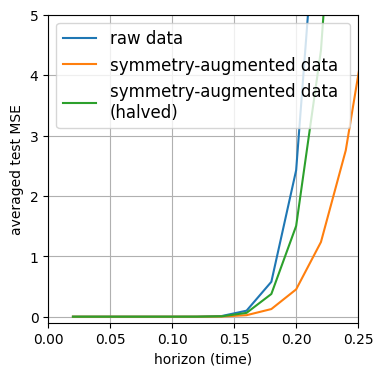

In [63]:
plt.figure(figsize=(4,4))
plt.plot(n_horizon_arr*(t_new[1]-t_new[0]), rerr_array_lorenz_whole,label="raw data")
plt.plot(n_horizon_arr*(t_new[1]-t_new[0]), rerr_array_lorenz_whole_double,label="symmetry-augmented data")
plt.plot(n_horizon_arr*(t_new[1]-t_new[0]), rerr_array_lorenz_whole_double_half,
         label="symmetry-augmented data \n(halved)")
plt.xlim([0,0.25])

plt.xlabel("horizon (time)")
plt.ylabel("averaged test MSE")
plt.grid('on')
plt.legend(loc='upper left',fontsize=12)
# plt.yscale('log')
plt.ylim([-1e-1,5])
# plt.title("Prediction performance on chaotic Lorenz attractor")
plt.savefig("lorenz_koopman.png",dpi=150)